## 00_EDA_Spotify.ipynb

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
spotify_data = pd.read_csv("../data/spotify_dataset.csv")
spotify_data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [70]:
df = spotify_data.drop(columns=["Unnamed: 0"])

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [72]:
df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [73]:
df[df["artists"].isnull()]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [74]:
duplicated_values = df.duplicated()
duplicated_values.sum()

np.int64(450)

In [75]:

df.loc[duplicated_values].head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1925,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,0,-7.544,1,0.0438,0.238000,0.860000,0.0571,0.843,90.522,4,afrobeat
2155,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.900,11,-3.674,1,0.0499,0.116000,0.000017,0.1190,0.599,104.655,4,alt-rock
3738,7mULVp0DJrI2Nd6GesLvxn,Joy Division,Timeless Rock Hits,Love Will Tear Us Apart,0,204621,False,0.524,0.902,2,-8.662,1,0.0368,0.000989,0.695000,0.1370,0.907,146.833,4,alternative
4648,6d3RIvHfVkoOtW1WHXmbX3,Little Symphony,Serenity,Margot,27,45714,False,0.269,0.142,0,-23.695,1,0.0509,0.866000,0.904000,0.1140,0.321,67.872,3,ambient
5769,481beimUiUnMUzSbOAFcUT,SUPER BEAVER,突破口 / 自慢になりたい,突破口,54,255080,False,0.472,0.994,8,-1.786,1,0.1140,0.025900,0.000000,0.0535,0.262,103.512,4,anime


In [76]:
df = df.drop_duplicates()
print(f"The number of rows in the dataset is {df.shape[0]} and the number of columns is {df.shape[1]}.")

The number of rows in the dataset is 113550 and the number of columns is 20.


In [77]:
df[df.duplicated(subset=["track_id"])].head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
3000,5E30LdtzQTGqRvNd7l6kG5,The Neighbourhood,Wiped Out!,Daddy Issues,87,260173,False,0.588,0.521,10,-9.461,1,0.0329,0.06780,0.149000,0.1230,0.337,85.012,4,alternative
3002,2K7xn816oNHJZ0aVqdQsha,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,Softcore,86,206280,False,0.575,0.568,9,-5.509,0,0.0300,0.04840,0.000417,0.2860,0.370,93.986,4,alternative
3003,2QjOHCTQ1Jl3zawyYOpxh6,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.807,10,-2.810,1,0.0336,0.04950,0.017700,0.1010,0.398,124.053,4,alternative
3011,6rrKbzJGGDlSZgLphopS49,The Score,ATLAS,Unstoppable,73,192106,False,0.485,0.843,1,-3.993,0,0.0467,0.00129,0.000010,0.1400,0.602,78.001,4,alternative
3012,0AUyNF6iFxMNQsNx2nhtrw,grandson,Blood // Water,Blood // Water,75,216720,False,0.510,0.882,8,-5.659,0,0.1590,0.00158,0.002060,0.0764,0.653,154.029,4,alternative


In [78]:
df = (df
      .drop_duplicates(subset=["track_id"])
      .reset_index(drop=True))

In [79]:
df.shape

(89741, 20)

In [80]:
song_artist_grouped = df.groupby(["track_name", "artists"])

grouped_counts = (song_artist_grouped
                  .size()
                  .reset_index(name="counts")
                  .sort_values(by="counts", ascending=False))

In [81]:
repeated_songs = grouped_counts.query("counts >= 1")
repeated_songs.head(10)

,track_name,artists,counts
55084,Rockin' Around The Christmas Tree,Brenda Lee,45
37981,Little Saint Nick - 1991 Remix,The Beach Boys,41
55570,Run Rudolph Run,Chuck Berry,40
23998,Frosty The Snowman,Ella Fitzgerald,34
37090,Let It Snow! Let It Snow! Let It Snow!,Dean Martin,32
42561,Mistletoe,Justin Bieber,31
59376,Sleigh Ride,Ella Fitzgerald,30
30348,I Saw Mommy Kissing Santa Claus,The Jackson 5,27
64803,The Christmas Song (Merry Christmas To You),Nat King Cole,26
56426,Santa Claus Is Coming To Town,The Jackson 5,26


In [82]:
repeated_songs.shape

(81343, 3)

In [83]:
repeated_songs_data = df

In [84]:
repeated_songs_data.shape

(89741, 20)

In [85]:
repeated_songs_data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [86]:
repeated_songs_data["track_genre"].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

Note:

In the provided genre mapping, the Single Genre category is employed to consolidate genres that do not comfortably fall into the other broader defined categories. The purpose of this grouping is to collect genres that are distinctive or do not share enough common traits with other genres to be placed in a more inclusive category.

Furthermore, the Global Sounds category is used to assemble musical genres originating from various cultural and regional backgrounds around the world. These genres represent global musical diversity and often blend in traditional and folk elements from their respective cultures.

In [87]:
genre_mapping = {
    'Rock/Metal': [
        'alt-rock', 'alternative', 'black-metal', 'death-metal', 'emo', 'grindcore',
        'hard-rock', 'hardcore', 'heavy-metal', 'metal', 'metalcore', 'psych-rock',
        'punk-rock', 'punk', 'rock-n-roll', 'rock', 'grunge', 'j-rock', 'goth',
        'industrial', 'rockabilly', 'indie'
    ],
    
    'Pop': [
        'pop', 'indie-pop', 'power-pop', 'k-pop', 'j-pop', 'mandopop', 'cantopop',
        'pop-film', 'j-idol', 'synth-pop'
    ],
    
    'Electronic/Dance': [
        'edm', 'electro', 'electronic', 'house', 'deep-house', 'progressive-house',
        'techno', 'trance', 'dubstep', 'drum-and-bass', 'dub', 'garage', 'idm',
        'club', 'dance', 'minimal-techno', 'detroit-techno', 'chicago-house',
        'breakbeat', 'hardstyle', 'j-dance', 'trip-hop'
    ],
    
    'Urban': [
        'hip-hop', 'r-n-b', 'dancehall', 'reggaeton', 'reggae'
    ],
    
    'Latino': [
        'brazil', 'salsa', 'samba', 'spanish', 'pagode', 'sertanejo',
        'mpb', 'latin', 'latino'
    ],
    
    'Global Sounds': [
        'indian', 'iranian', 'malay', 'turkish', 'tango', 'afrobeat', 'french', 'german', 'british', 'swedish'
    ],
    
    'Jazz and Soul': [
        'blues', 'bluegrass', 'funk', 'gospel', 'jazz', 'soul', 'groove', 'disco', 'ska'
    ],
    
    'Varied Themes': [
        'children', 'disney', 'forro', 'kids', 'party', 'romance', 'show-tunes',
        'comedy', 'anime'
    ],
    
    'Instrumental': [
        'acoustic', 'classical',  'guitar', 'piano',
        'world-music', 'opera', 'new-age'
    ],
    
    'Mood': [
        'ambient', 'chill', 'happy', 'sad', 'sleep', 'study'
    ],
    
    'Single Genre': [
        'country', 'honky-tonk', 'folk', 'singer-songwriter'
    ]
}

In [88]:
genre_category_mapping = {genre: category for category, genres in genre_mapping.items() for genre in genres}

repeated_songs_data["track_genre"] = repeated_songs_data["track_genre"].map(genre_category_mapping)

In [89]:
repeated_songs_data["track_genre"].unique()


array(['Instrumental', 'Global Sounds', 'Rock/Metal', 'Mood',
       'Varied Themes', 'Jazz and Soul', 'Latino', 'Electronic/Dance',
       'Pop', 'Single Genre', 'Urban'], dtype=object)

Keeping only the first record encountered

Now, we can eliminate duplicate records that are identical across all columns except for track_id and album_name. In these instances, only the first record encountered will be preserved.

In [90]:
subset_cols = [col for col in repeated_songs_data.columns if col not in ["track_id", "album_name"]]

repeated_songs_data = repeated_songs_data.drop_duplicates(subset=subset_cols, keep="first")

repeated_songs_data.shape

(86067, 20)

In [91]:
song_artist_grouped = repeated_songs_data.groupby(["track_name", "artists"])
song_artist_grouped

grouped_counts = (song_artist_grouped
                  .size()
                  .reset_index(name="counts")
                  .sort_values(by="counts", ascending=False))

In [92]:
repeated_songs = grouped_counts.query("counts > 1")
repeated_songs.head(10)

,track_name,artists,counts
53125,RUMBATÓN,Daddy Yankee,8
22385,Feliz Cumpleaños Ferxxo,Feid,8
24368,GATÚBELA,KAROL G;Maldy,8
27620,Heat Waves,Glass Animals,7
66005,The Race Is On,George Jones,7
46121,Normal,Feid,7
36663,Layla,DJ Robin;Schürze,6
70172,Until I Found You,Stephen Sanchez,6
27378,He Stopped Loving Her Today,George Jones,6
74573,X ÚLTIMA VEZ,Daddy Yankee;Bad Bunny,6


Duplicates across several distinct columns

Upon reviewing some of the remaining records, we notice that there are additional columns with varying values apart from track_id and album_name.

Here, we observe multiple versions of the song; however, not every version enjoys the same level of popularity.

In [93]:
(repeated_songs_data
    .query('track_name == "Feliz Cumpleaños Ferxxo" & artists == "Feid"')
    .sort_values(by=["popularity"], ascending=False)
    .head(5))

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
57772,3kUq4sBcmxhnOtNysZ9yrp,Feid,Feliz Cumpleaños Ferxxo,Feliz Cumpleaños Ferxxo,87,156400,False,0.870,0.550,5,-5.537,1,0.0722,0.1020,0.0,0.293,0.566,95.019,4,Latino
57717,2CeKVsFFXG4QzA415QygGb,Feid,FELIZ CUMPLEAÑOS FERXXO TE PIRATEAMOS EL ÁLBUM,Feliz Cumpleaños Ferxxo,84,155960,False,0.865,0.573,5,-5.501,1,0.0678,0.0863,0.0,0.305,0.563,94.999,4,Latino
56945,08jXpbmBrMtXXAtXlHgsHh,Feid,Perreo en Halloween,Feliz Cumpleaños Ferxxo,8,155960,False,0.865,0.573,5,-5.501,1,0.0678,0.0863,0.0,0.305,0.563,94.999,4,Latino
56903,4SGpb5hFrz394Fp4LcXGgt,Feid,Feliz Cumpleaños con Perreo,Feliz Cumpleaños Ferxxo,7,155960,False,0.865,0.573,5,-5.501,1,0.0678,0.0863,0.0,0.305,0.563,94.999,4,Latino
56900,467COmJuCIz4s7sorVviYj,Feid,FELIZ CUMPLEAÑOS,Feliz Cumpleaños Ferxxo,5,155960,False,0.865,0.573,5,-5.501,1,0.0678,0.0863,0.0,0.305,0.563,94.999,4,Latino


In [94]:
repeated_songs_data = (repeated_songs_data
                       .sort_values(by="popularity", ascending=False)
                       .groupby(["track_name", "artists"])
                       .head(1)
                       .sort_index()
                       .reset_index(drop=True))

In [95]:
repeated_songs_data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,Instrumental
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,Instrumental
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,Instrumental
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,Instrumental
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,Instrumental


In [96]:
df = repeated_songs_data

In [97]:
df.shape

(81343, 20)

Song Duration

Milliseconds converted to minutes only
In this segment we aim to reformat the song duration column: we convert it from milliseconds, an unintuitive unit, into minutes only, which simplifies the analysis of the duration data.
The conversion is performed by applying a lambda function to each value, which converts milliseconds into minutes by dividing by 60,000 (since there are 60,000 milliseconds in a minute). Using the // operator ensures that the result is an integer.

In [98]:
df["duration_min"] = (df["duration_ms"]
                      .apply(lambda x: f"{x // 60000}"))

df["duration_min"] = df["duration_min"].astype(int)

In [99]:
df[["duration_ms", "duration_min"]].head(10)


,duration_ms,duration_min
0,230666,3
1,149610,2
2,210826,3
3,201933,3
4,198853,3
5,214240,3
6,229400,3
7,242946,4
8,189613,3
9,205594,3


Organizing the song duration into categories

We are going to establish three groups:

Short: Songs that last less than 2.5 minutes (150,000 ms).

Average: Songs whose duration is between 2.5 minutes (150,000 ms) and 5 minutes (300,000 ms).

Long: Songs that extend beyond 5 minutes (300,000 ms).

In [100]:
def categorize_duration(duration_ms):
    if duration_ms < 150000:
        return "Short"
    elif 150000 <= duration_ms <= 300000:
        return "Average"
    else:
        return "Long"

df["duration_category"] = df["duration_ms"].apply(categorize_duration)

df[["duration_ms", "duration_category"]].head()

,duration_ms,duration_category
0,230666,Average
1,149610,Short
2,210826,Average
3,201933,Average
4,198853,Average


Categorizing Song Popularity

Using the same method as earlier, we will classify song popularity into groups to improve the clarity of graphs and simplify filtering.

Popularity scores are divided into three levels:

Low: Scores ranging from 0 to 30.
Medium: Scores ranging from 31 to 70.
High: Scores ranging from 71 to 100.

In [101]:
def categorize_popularity(popularity):
    if popularity <= 30:
        return "Low Popularity"
    elif 31 <= popularity <= 70:
        return "Average Popularity"
    else:
        return "High Popularity"

df["popularity_category"] = df["popularity"].apply(categorize_popularity)

df[["popularity", "popularity_category"]].head()

,popularity,popularity_category
0,73,High Popularity
1,55,Average Popularity
2,57,Average Popularity
3,71,High Popularity
4,82,High Popularity


Assigning track mood based on valence values

The dataset's valence column indicates the musical positivity of a track. Its values range from 0 to 1, where lower valence values correspond to a more negative or sad mood, and higher values denote a more positive or happy mood. Based on this metric, we will create a new column named track_mood, categorizing each track’s mood.

Categories for track_mood:

Sad: Tracks with valence from 0 to 0.3.

Neutral: Tracks with valence from 0.31 to 0.6.

Happy: Tracks with valence from 0.61 to 1.0.

In [102]:
def determine_mood(valence):
    if valence <= 0.3:
        return "Sad"
    elif 0.31 <= valence <= 0.6:
        return "Neutral"
    else:
        return "Happy"

df["track_mood"] = df["valence"].apply(determine_mood)

df[["valence", "track_mood"]].head()

,valence,track_mood
0,0.715,Happy
1,0.267,Sad
2,0.120,Sad
3,0.143,Sad
4,0.167,Sad


In [103]:
df["live_performance"] = df["liveness"] > 0.8

In [104]:
live_counts = df["live_performance"].value_counts()
print(live_counts)

live_performance
False    78581
True      2762
Name: count, dtype: int64


Dropping columns: speechiness, acousticness, and instrumentalness

Prior to removing these columns, it’s crucial to evaluate their distributions to verify their importance in our dataset. We'll examine how their values are distributed.

From the visual analysis, it's evident that most values are concentrated near zero. This implies that these features exhibit minimal variability, thus providing limited meaningful insights for our analysis. Consequently, eliminating them is a practical measure to streamline the dataset.

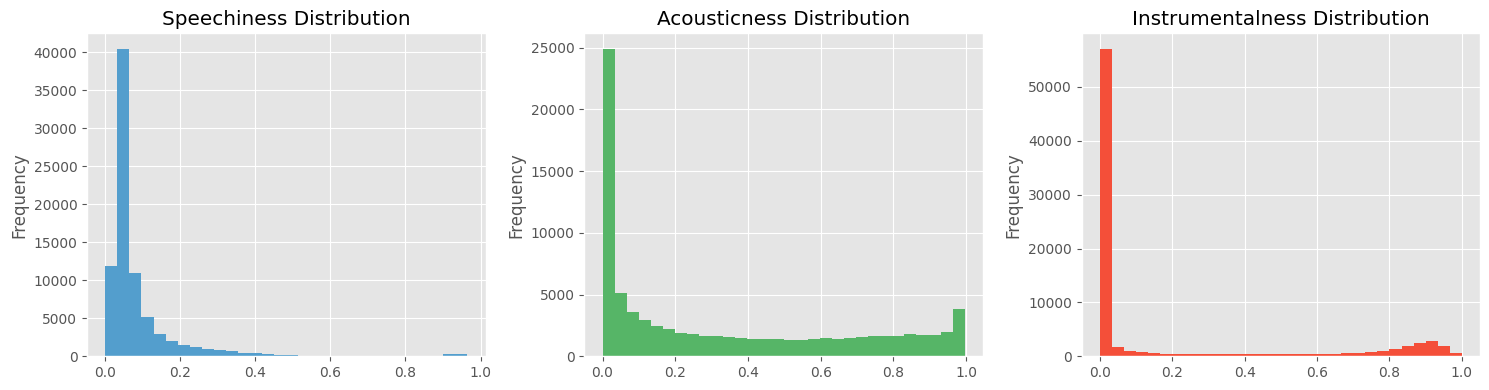

In [105]:
def sns_colors(color):
    return sns.color_palette(color)[3]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Speechiness
df["speechiness"].plot(kind="hist", bins=30, ax=axes[0], color=sns_colors("Blues"), title="Speechiness Distribution")

# Acousticness
df["acousticness"].plot(kind="hist", bins=30, ax=axes[1], color=sns_colors("Greens"), title="Acousticness Distribution")

# Instrumentalness
df["instrumentalness"].plot(kind="hist", bins=30, ax=axes[2], color=sns_colors("Reds"), title="Instrumentalness Distribution")

plt.tight_layout()
plt.show()

Let’s also take a look at the top 10 songs that scored the highest across these three features.



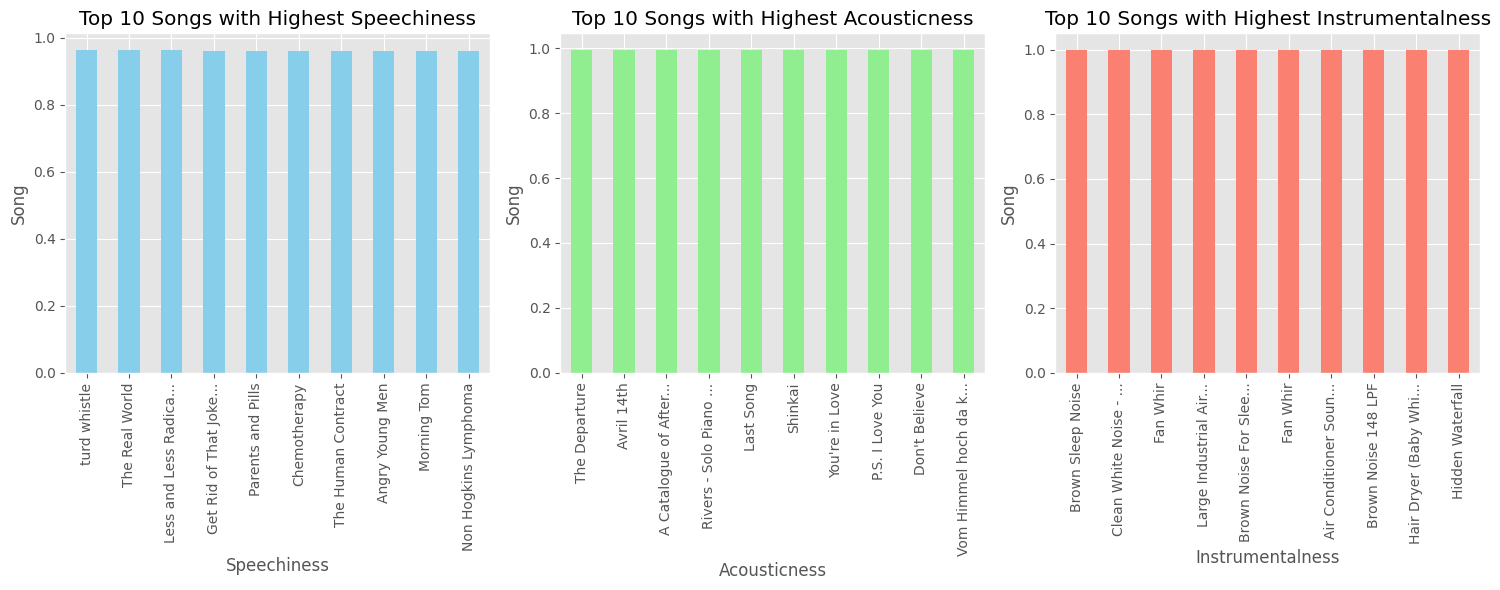

In [106]:
def shorten_title(title, max_length=20):
    if len(title) > max_length:
        return title[:max_length] + '...'
    return title

fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Top 10 songs with highest speechiness
top_speechiness = df.nlargest(10, "speechiness")
top_speechiness["short_track_name"] = top_speechiness["track_name"].apply(shorten_title)
top_speechiness.plot(kind="bar", x="short_track_name", y="speechiness", ax=axes[0], color="skyblue", legend=False)
axes[0].set_title("Top 10 Songs with Highest Speechiness")
axes[0].set_xlabel("Speechiness")
axes[0].set_ylabel("Song")

# Top 10 songs with highest acousticness
top_acousticness = df.nlargest(10, "acousticness")
top_acousticness["short_track_name"] = top_acousticness["track_name"].apply(shorten_title)
top_acousticness.plot(kind="bar", x="short_track_name", y="acousticness", ax=axes[1], color="lightgreen", legend=False)
axes[1].set_title("Top 10 Songs with Highest Acousticness")
axes[1].set_xlabel("Acousticness")
axes[1].set_ylabel("Song")

# Top 10 songs with highest instrumentalness
top_instrumentalness = df.nlargest(10, "instrumentalness")
top_instrumentalness["short_track_name"] = top_instrumentalness["track_name"].apply(shorten_title)
top_instrumentalness.plot(kind="bar", x="short_track_name", y="instrumentalness", ax=axes[2], color="salmon", legend=False)
axes[2].set_title("Top 10 Songs with Highest Instrumentalness")
axes[2].set_xlabel("Instrumentalness")
axes[2].set_ylabel("Song")

plt.tight_layout()
plt.show()

In [107]:
df = df.drop(columns=["speechiness", "acousticness", "instrumentalness"])

i’ll now remove some additional columns that do not contribute meaningfully to our analysis.

In [108]:
df = df.drop(columns=["mode", "duration_ms", "key", "tempo", "valence", "liveness", "time_signature"])

In [109]:
df.head(4)

,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,loudness,track_genre,duration_min,duration_category,popularity_category,track_mood,live_performance
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,False,0.676,0.4610,-6.746,Instrumental,3,Average,High Popularity,Happy,False
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,False,0.420,0.1660,-17.235,Instrumental,2,Short,Average Popularity,Sad,False
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,False,0.438,0.3590,-9.734,Instrumental,3,Average,Average Popularity,Sad,False
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,False,0.266,0.0596,-18.515,Instrumental,3,Average,High Popularity,Sad,False


Understanding the Data

What elements contribute to a song becoming a hit?

Which artist doesn’t aspire to gain recognition? Which manager wouldn’t aim to capitalize on their artist’s success?

In today’s data-driven world, analyzing the factors contributing to a song’s popularity is critical. Additionally, many patterns observed in top hits frequently appear across various popularity ranges as well.

Selecting the top songs

We'll concentrate on the songs with the highest popularity scores to examine their features more thoroughly. Before beginning our analysis, it’s necessary to understand how popularity scores are distributed throughout the dataset.

We can observe that highly popular songs are relatively uncommon within the data, making it easier to examine how different variables relate to each other.

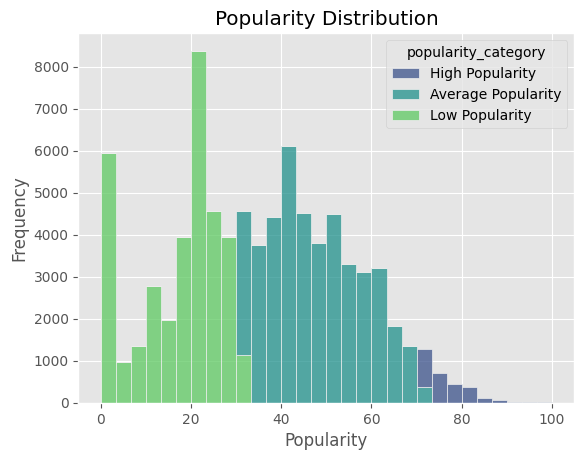

In [110]:
sns.histplot(data=df, x="popularity", hue="popularity_category", bins=30, multiple="stack", palette="viridis")

plt.title("Popularity Distribution")
plt.xlabel("Popularity")
plt.ylabel("Frequency")

plt.show()

We identify the top songs by evaluating their popularity within their respective categories

In [111]:
def color_palette(df):
    n_colors = len(df)
    return sns.color_palette("light:#5A9", n_colors=n_colors)

In [112]:
popular_songs = (df
                 .query('popularity_category == "High Popularity"')
                 .reset_index(drop=True)
                 .sort_values(by="popularity", ascending=False))

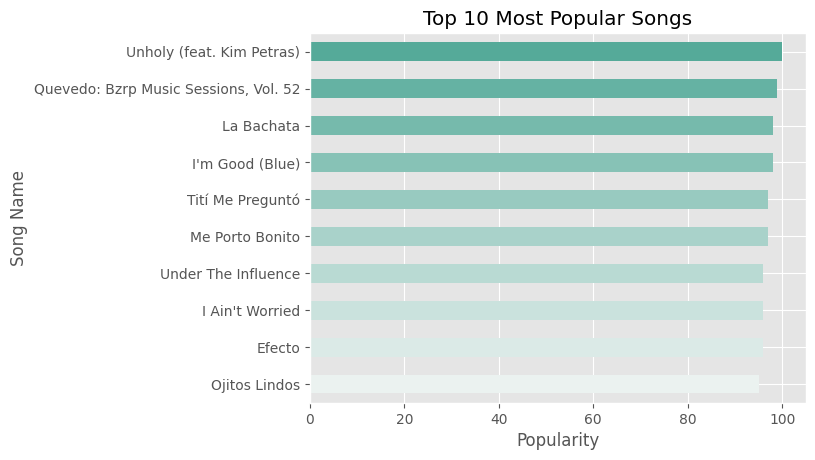

In [113]:
popular_barh = (popular_songs
                .head(10)
                .sort_values(by="popularity"))

(
popular_barh
 .plot(kind="barh",
       x="track_name",
       y="popularity",
       color=color_palette(popular_barh),
       legend=False)
 )

plt.title("Top 10 Most Popular Songs")
plt.xlabel("Popularity")
plt.ylabel("Song Name")

plt.show()

How loud is loud enough?

It's noticeable that the majority of hit songs feature loudness levels between roughly -10 dB and -2.5 dB. This indicates a common practice in popular music: keeping tracks relatively loud to enhance their sonic presence while still preserving audio quality and avoiding distortion.

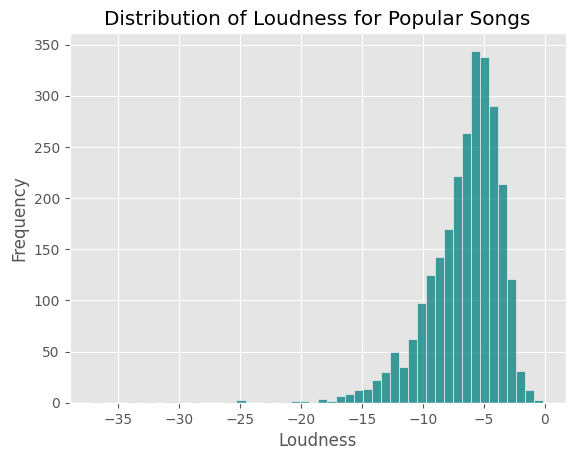

In [114]:
sns.histplot(data=popular_songs, x="loudness", multiple="stack", color="teal", bins=50)

plt.title("Distribution of Loudness for Popular Songs")
plt.xlabel("Loudness")
plt.ylabel("Frequency")

plt.show()

What’s the ideal song length?

The majority of popular tracks tend to last between 2 and 4 minutes, with a smaller portion extending to 5 minutes. This pattern suggests that shorter songs are generally favored in mainstream music, possibly due to their higher replay value and compatibility with streaming and radio formats.

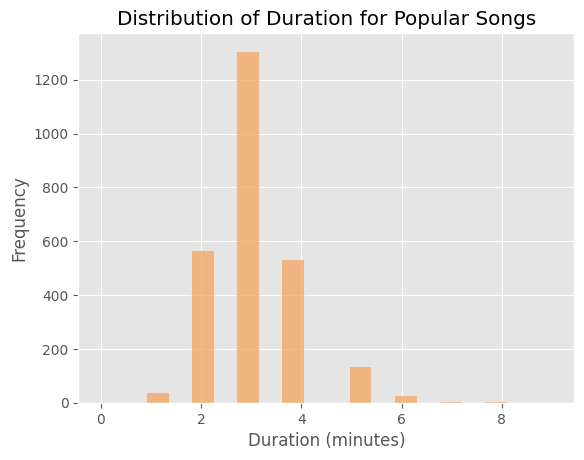

In [115]:
popular_duration_hist = popular_songs.sort_values(by="duration_min")

sns.histplot(data=popular_duration_hist, x="duration_min", multiple="stack", color="sandybrown", bins=20)

plt.title("Distribution of Duration for Popular Songs")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")

plt.show()

Here we see the distribution of song durations across the entire dataset.
 The trend observed earlier remains consistent, confirming that most tracks tend to fall within a similar length range.

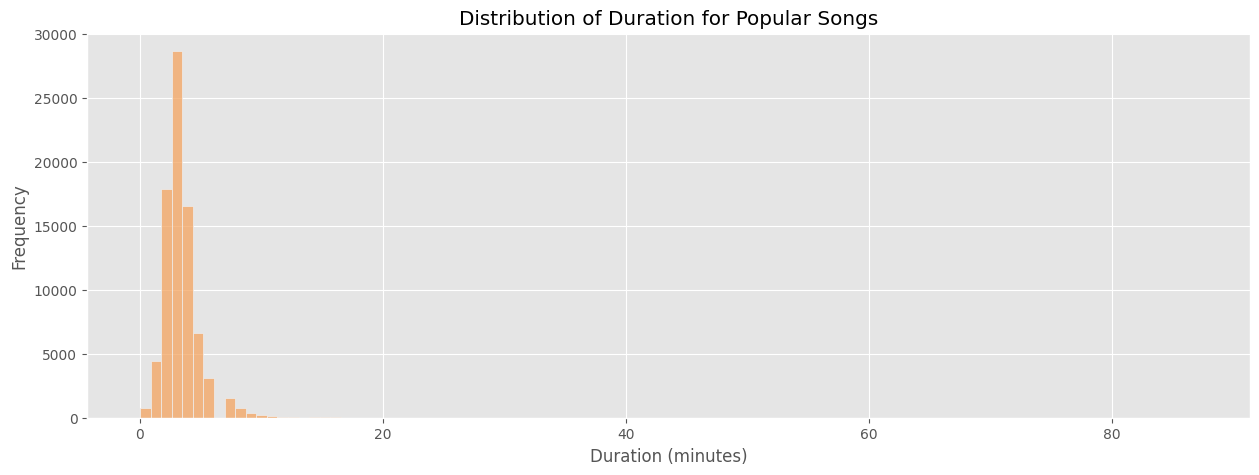

In [116]:
plt.figure(figsize=(15, 5))

sns.histplot(data=df, x="duration_min", multiple="stack", color="sandybrown", bins=100)

plt.title("Distribution of Duration for Popular Songs")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")

plt.show()

To assess how danceable and energetic the songs are, we used boxplots to visualize the spread of these two characteristics.

The danceability boxplot reveals a median of approximately 0.65,
suggesting that most tracks have a fairly high tendency to be danceable. Still, there are a few songs with danceability scores under 0.2, standing out as clear exceptions.

As for energy, the median hovers around 0.7, pointing to a generally energetic nature of the songs. However, energy values are more dispersed than danceability, reflecting a broader range of intensity across the dataset. Some songs also show very low energy levels (below 0.15), appearing as outliers.

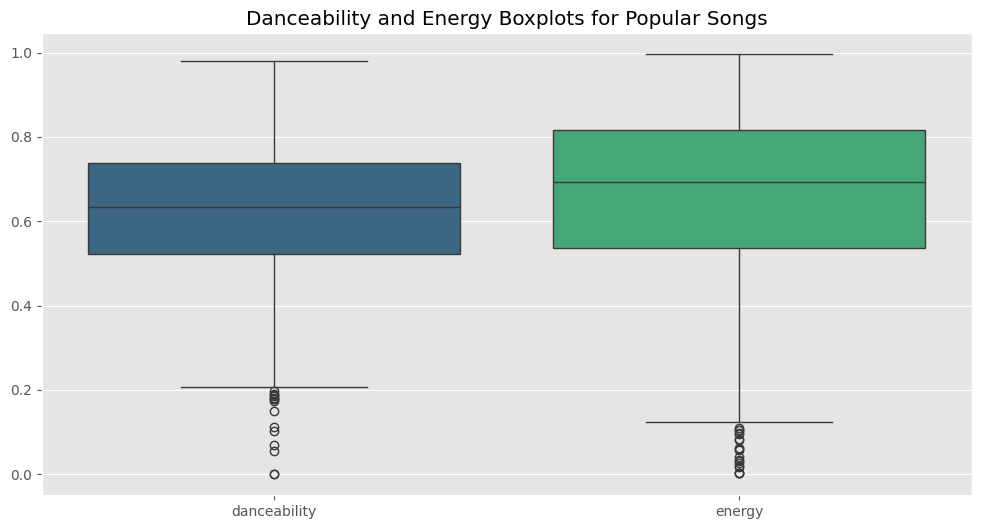

In [117]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=popular_songs[["danceability", "energy"]], palette="viridis")

plt.title("Danceability and Energy Boxplots for Popular Songs")

plt.show()

To explore the relationship between a song’s mood and its energy and danceability, 
a scatter plot was generated where each point represents a song, color-coded by mood (Sad, Neutral, Happy). This visualization helps us understand how these emotional tones interact with musical characteristics.

From the scatter plot, we can notice clear trends:

Sad songs usually appear in the lower-left quadrant, showing lower values for both energy and danceability.

Neutral tracks are more evenly scattered, though many center around mid-range values for both attributes.

Happy songs are concentrated in the upper-right quadrant, indicating a tendency toward high energy and high danceability.

Moreover, there's a noticeable clustering of songs in the mid-to-high range for both variables, suggesting that regardless of emotional tone, songs often lean toward being moderately energetic and danceable.

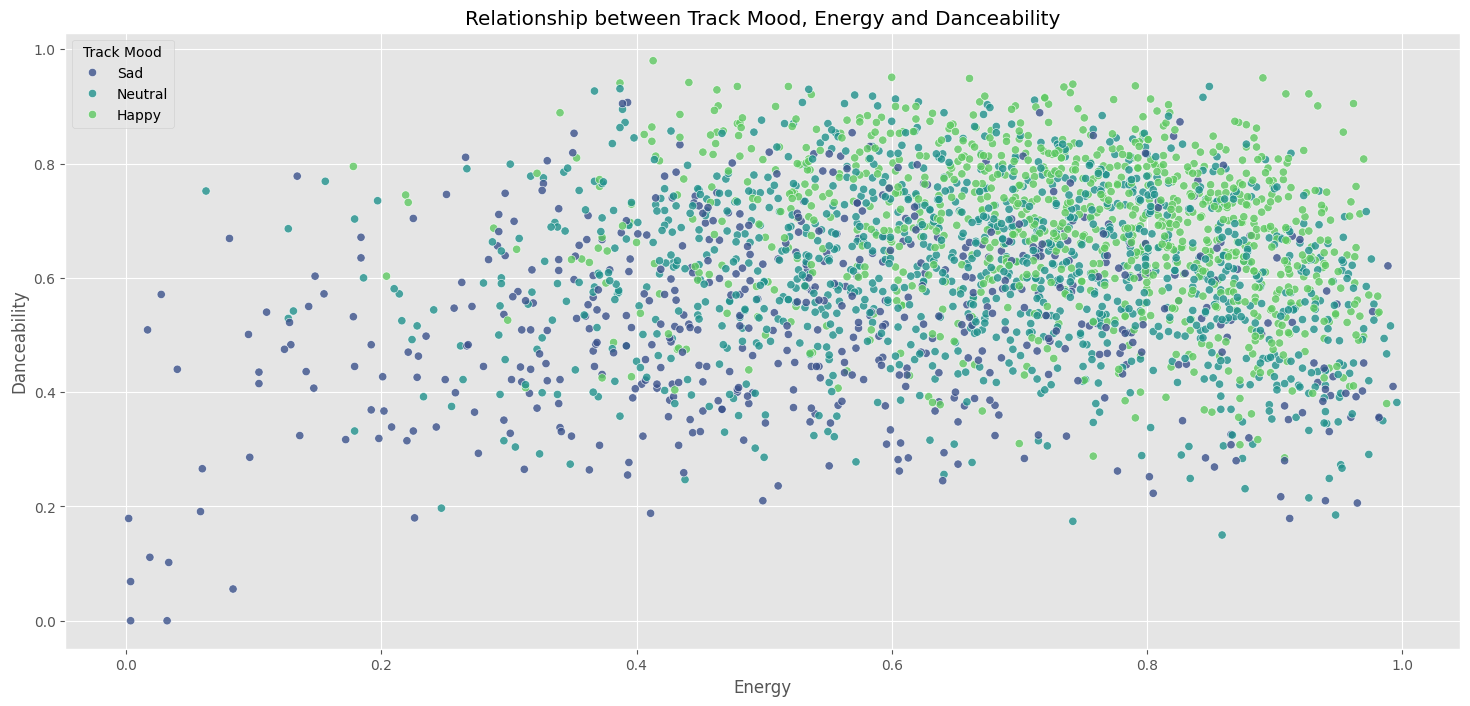

In [118]:
plt.figure(figsize=(18, 8))

sns.scatterplot(data=popular_songs, x="energy", y="danceability", hue="track_mood", palette="viridis", alpha=0.8)

plt.title("Relationship between Track Mood, Energy and Danceability")
plt.xlabel("Energy")
plt.ylabel("Danceability")

plt.legend(title="Track Mood")

plt.show()

Conclusions

Data Preparation:

Several unneeded columns were dropped, including Unnamed: 0, speechiness, acousticness, instrumentalness, mode, duration_ms, key, tempo, valence, liveness, and time_signature.

Duplicate entries were removed using track_id and additional filters, bringing the dataset down to approximately 81,000 rows.

Music genres were consolidated into broader groups to streamline the analysis.

Data Transformation:

A new column named duration_min was added to express song duration in minutes.

Songs were classified by length into Short, Average, and Long categories.

Popularity was segmented into three tiers: Low, Average, and High.

Song moods were inferred (as Sad, Neutral, or Happy) based on the valence metric.

A live_performance column was introduced to flag live recordings.

Popularity Insights:

Highly popular tracks generally exhibit loudness levels between -10 dB and -2.5 dB.

Their duration typically falls within the 2–4 minute range.

These tracks also show significant diversity in both danceability and energy, with median values near 0.65 and 0.7, respectively.